In [40]:
import pandas as pd
import numpy as np

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
train = pd.read_csv('titanic_train.csv')

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


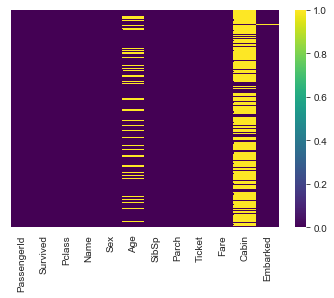

In [44]:
sns.heatmap(train.isnull(),yticklabels= False , cmap= 'viridis')

In [45]:
sns.set_style('whitegrid')

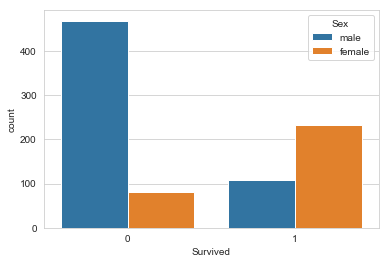

In [46]:
sns.countplot(x='Survived',hue='Sex', data=train)

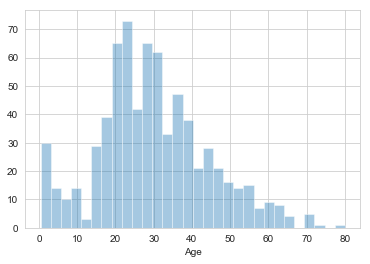

In [47]:
sns.distplot(train['Age'].dropna(),kde=False, bins=30)

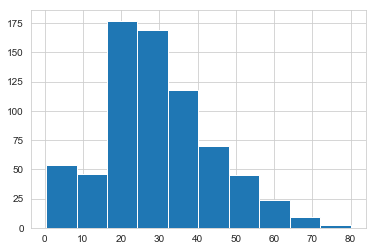

In [48]:
train['Age'].hist()

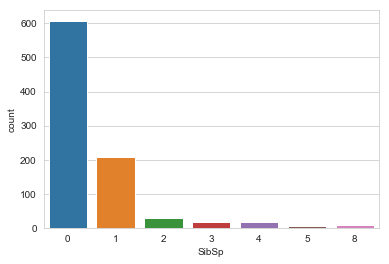

In [49]:
sns.countplot(x='SibSp', data=train)

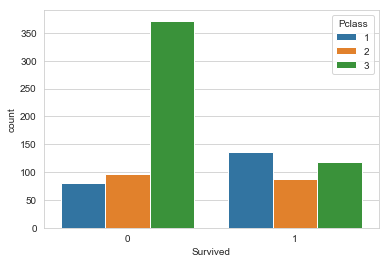

In [50]:
sns.countplot(x='Survived',hue= 'Pclass' ,data=train)

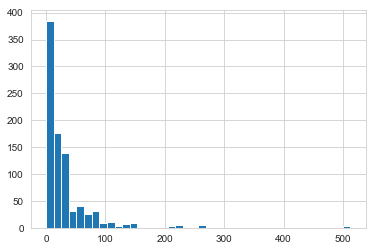

In [51]:
train['Fare'].hist(bins=40)

In [52]:
import cufflinks as cf

In [53]:
cf.go_offline()

In [54]:
#train['Fare'].iplot(kind = 'hist')

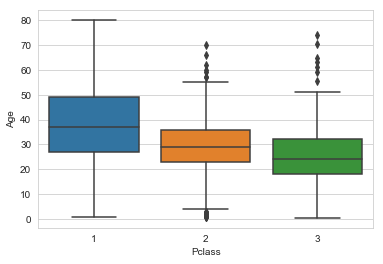

In [55]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [56]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1 :
            return 37
        elif Pclass == 2 :
            return 29
        else:
            return 24
    else:
        return Age
        

In [57]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

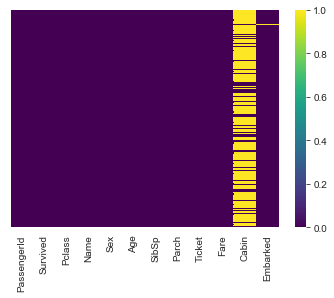

In [58]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [59]:
train.drop('Cabin', inplace=True , axis=1)

In [60]:
train.dropna(inplace=True)

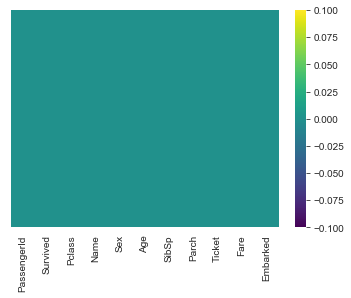

In [61]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [62]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [63]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [64]:
train= pd.concat([train,sex,embark], axis=1)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [66]:
train.drop(['Ticket','Name','Sex','Embarked'], inplace=True, axis=1)

In [67]:
train.drop('PassengerId',axis=1, inplace= True)

In [68]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [69]:
X = train.drop('Survived', axis= 1)
y = train['Survived']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel = LogisticRegression()

In [74]:
logmodel.fit(X_train,y_train)

/Users/virajsat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
predictions = logmodel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

